# PFC Self-Admin Analysis

### Install and load modules

In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from utils import compute_global_limits, process_day_data, plot_day, plot_no_data

### Initialize database connection

In [2]:
try:
    db_path = "./output/PFC_Self-Admin.db"
    conn = sqlite3.connect(db_path)
except Exception as e:
    print(f"Error connecting to database: {e}")
    exit()

### Extract data

In [3]:
try:
    days_df = pd.read_sql_query("SELECT day_id, label FROM Days ORDER BY label", conn)
    days = days_df['label'].tolist()
    day_ids = days_df['day_id'].tolist()
    num_days = len(days)

    if num_days == 0:
        print("No days found in database.")
        exit()

    pop_ylim, cluster_ylim = compute_global_limits(conn, day_ids)
except (ValueError, IndexError) as e:
    print(f"Error reading data from database: {e}")
    conn.close()
    exit()

Processing days for limits: 100%|██████████| 8/8 [00:45<00:00,  5.63s/it]


### Visualize data

Plotting data: 100%|██████████| 8/8 [00:42<00:00,  5.26s/it]


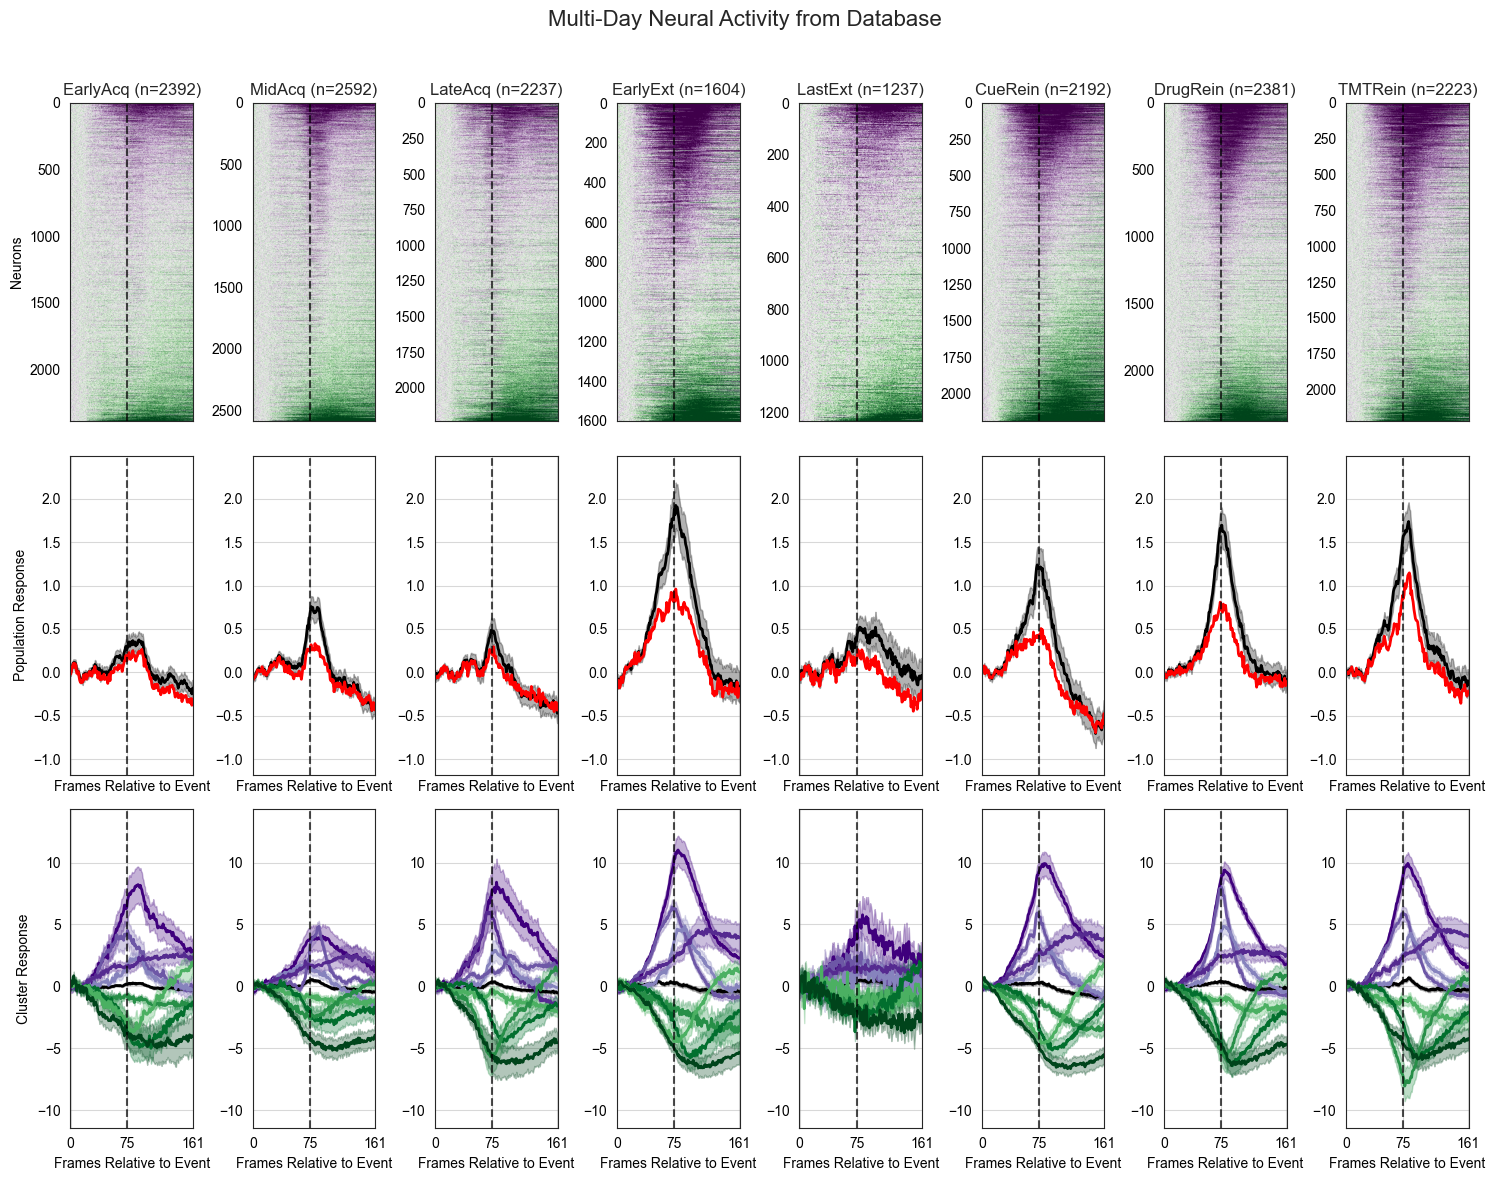

In [4]:
try:
    sns.set_style('white')
    fig, axes = plt.subplots(3, num_days, figsize=(15, 12), sharex='col', squeeze=False)
    fig.suptitle("Multi-Day Neural Activity from Database\n\n", fontsize=16)

    for idx, (did, day) in enumerate(tqdm(zip(day_ids, days), total=num_days, desc="Plotting data")):
        sorted_temp, cluster_data, pop_data, num_valid_neurons = process_day_data(conn, did)

        if num_valid_neurons == 0:
            plot_no_data(axes, day, pop_ylim, cluster_ylim, idx)
            continue

        plot_day(
            axes[0, idx], axes[1, idx], axes[2, idx],
            sorted_temp, cluster_data, pop_data, num_valid_neurons,
            day, pop_ylim, cluster_ylim, idx
        )

    plt.tight_layout()
    plt.show()
except Exception as e:
    print(f"Error plotting data: {e}")
    conn.close()
    exit()
finally:
    conn.close()